<p style="font-family:Times;font-size:150%; text-align:left"> <font color='red'>Time Series: Pemodelan pergerakan harga saham dengan Deep Learning</font></p>

> Ini contoh penggunaan data time series di dalam Deep Learning. Kali ini time series yang dimodelkan adalah data pergerakan harga saham yang terdiri dari 250 observasi. Pemodelan ini dirancang untuk menghasilkan prediksi. Kali ini digunakan model yang relatif masih sederhana dan hasil prediksinya masih perlu ditinjau dengan kajian yang lebih seksama. Namun demikian model ini akan tetapi bermanfaat untuk mengantarkan kita ke arah pemodelan Recurrent Neural Network (RNN).

>Kesederhanaan model membuat seseorang akan mudah terpancing untuk membawa ke arah model Deep Learning yang lebih kompleks. Namun semakin kompleks model Deep Learning maka akan semakin mudah ia akan mengalami overfitting: yaitu performance model sewaktu training jauh lebih baik dibanding dengan performance model sewaktu test. Bila ini terjadi maka perlu dilakukan tindakan penggunan regularisasi L1 atau L2.

Prepared by M. Syamsuddin, Prodi Matematika - FMIPA ITB, 02/March/2020

In [1]:
import numpy as np
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
from datetime import datetime
import pickle

%matplotlib inline

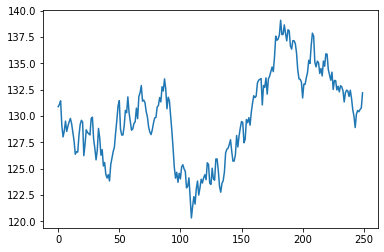

In [2]:
x = pickle.load(open("HargaSaham.dat", "rb"))   #Ini data harga saham sebanyak 250 observasi.
N = x.shape[0]

plt.plot(x)
plt.show()

xs = (x-x.min())/(x.max()-x.min())   #Datanya distandardisasikan dulu

step = 3   #Di literatur Time Series digunakan istilah 'lag' sebagai padanan istilah 'step' ini
xt = xs[0:N-step,:]
for i in range(step):
    xt = hstack((xt, xs[i+1:N-step+i+1]))   #Dihasilkan matriks dengan 4 kolom, #tiga kolom pertama
                                            #menjadi variabel X dan kolom terkhir menjadi variabel y

X = xt[:, 0:step]       #Tiga kolom pertama dijadikan sebagai varibel X
y = xt[:, step:step+1]  #Kolom terakhir dijadikan sebagai variabel y


In [3]:
class NeuralNetwork:
    
    def __init__(self,x,y,h1,h2): # ada h nodes di dalam hidden layer
        self.X   = x #input
        self.y   = y #output
        
        self.N   = x.shape[0] #jumlah observasi (samples, examples)
        Ni       = x.shape[1] #jumlah features (variables)
        No       = y.shape[1] 
        
        self.W0  = randn(Ni,h1) #nilai awal buat W dari layer 0 (input layer)
        self.b0  = zeros([1,h1]) #nilai awal buat b dari layer 0 (hidden layer)
        
        self.W1  = randn(h1,h2) #nilai awal buat W dari layer 1 (hidden layer)
        self.b1  = zeros([1,h2]) #nilai awal buat b dari layer 1 (hidden layer)

        self.W2  = randn(h2,No) #nilai awal buat W dari layer 2 (output layer)
        self.b2  = zeros([1,No]) #nilai awal buat b dari layer 2 (output layer)
        
    def forward(self):
        Z1       = self.X@self.W0 + self.b0
        self.A1  = 1/(1 + exp(-Z1))
        
        Z2       = self.A1@self.W1 + self.b1
        self.A2  = 1/(1 + exp(-Z2))
        
        Z3       = self.A2@self.W2 + self.b2
        self.A3  = 1/(1 + exp(-Z3))
        
        return self.A3
        
    def backward(self):
        alpha    = 0.1
        e        = self.y - self.A3
        
        delta3   = -e*self.A3*(1 - self.A3) #dC/dZ3
        delta2   = delta3@self.W2.T*self.A2*(1 - self.A2) #dC/dZ2
        delta1   = delta2@self.W1.T*self.A1*(1 - self.A1) #dC/dZ1
    
        self.W2 -= alpha*self.A2.T@delta3
        self.b2 -= alpha*sum(ones([self.N,1]).T@delta3)
        
        self.W1 -= alpha*self.A1.T@delta2
        self.b1 -= alpha*ones([self.N,1]).T@delta2
        
        self.W0 -= alpha*self.X.T@delta1
        self.b0 -= alpha*ones([self.N,1]).T@delta1

    def train(self):
        self.forward()  #forward propagation
        self.backward() #backward propagation

In [5]:
H1  = 10  #ada H1 nodes (neurons) di dalam hidden layer pertama
H2  = 10  #ada H2 nodes (neurons) di dalam hidden layer pertama

epochs = 25001 #lakukan latihan sebanyak epochs kali
seed(2020) #seed untuk bilangan acak

ann = NeuralNetwork(X,y,H1,H2)

for i in range(epochs): 
    
    if i % 2500 == 0: 
        print ("Iteration #:",i,', ',end = "")
        #print ("Predicted Output: \n", str(ann.forward()))
        
        ycap = ann.forward()
        cost = (y-ycap).T@(y-ycap)/N #Mean Squared Error (MSE) atau cost function
        
        print ("Akurasi prediksi diukur dengan MSE: %9.7f" %cost[0][0]) # 
        #print ("\n")

    ann.train()

Iteration #: 0 , Akurasi prediksi diukur dengan MSE: 0.0937272
Iteration #: 2500 , Akurasi prediksi diukur dengan MSE: 0.0032788
Iteration #: 5000 , Akurasi prediksi diukur dengan MSE: 0.0029954
Iteration #: 7500 , Akurasi prediksi diukur dengan MSE: 0.0029236
Iteration #: 10000 , Akurasi prediksi diukur dengan MSE: 0.0028817
Iteration #: 12500 , Akurasi prediksi diukur dengan MSE: 0.0028519
Iteration #: 15000 , Akurasi prediksi diukur dengan MSE: 0.0028290
Iteration #: 17500 , Akurasi prediksi diukur dengan MSE: 0.0028102
Iteration #: 20000 , Akurasi prediksi diukur dengan MSE: 0.0027941
Iteration #: 22500 , Akurasi prediksi diukur dengan MSE: 0.0027800
Iteration #: 25000 , Akurasi prediksi diukur dengan MSE: 0.0027673
